<a href="https://colab.research.google.com/github/madenni/NN-DIP/blob/main/NS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from keras.losses import sparse_categorical_crossentropy
from keras.layers import BatchNormalization, Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.datasets import cifar100
from keras.utils import to_categorical

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

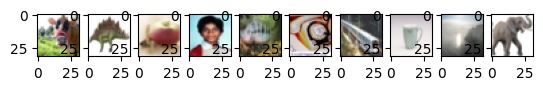

In [5]:
fig, ax = plt.subplots(1, 10)

for i in range(10):
    ax[i].imshow(X_train[i])

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train = X_train.reshape((X_train.shape[0], 
                           X_train.shape[1], 
                           X_train.shape[2], 
                           3))
X_train = X_train/ 255.0

In [9]:
X_test = X_test.reshape((X_test.shape[0], 
                         X_test.shape[1], 
                         X_test.shape[2], 3))
X_test = X_test/ 255.0

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [12]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(100, activation="softmax"))
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 128
epochs = 5

Обучите созданную модель

In [13]:
model_1_history = model_1.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 83s 207ms/step - loss: 4.1244 - accuracy: 0.0723 - val_loss: 3.7429 - val_accuracy: 0.1361
Epoch 2/5
391/391 [==============================] - 88s 224ms/step - loss: 3.5371 - accuracy: 0.1620 - val_loss: 3.4234 - val_accuracy: 0.1871
Epoch 3/5
391/391 [==============================] - 92s 236ms/step - loss: 3.2374 - accuracy: 0.2157 - val_loss: 3.1726 - val_accuracy: 0.2293
Epoch 4/5
391/391 [==============================] - 74s 189ms/step - loss: 3.0364 - accuracy: 0.2522 - val_loss: 3.0006 - val_accuracy: 0.2641
Epoch 5/5
391/391 [==============================] - 75s 192ms/step - loss: 2.8998 - accuracy: 0.2795 - val_loss: 2.9143 - val_accuracy: 0.2865


### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [14]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(100))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [15]:
model_2_history = model_2.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 78s 194ms/step - loss: 3.8629 - accuracy: 0.1359 - val_loss: 4.0042 - val_accuracy: 0.1027
Epoch 2/5
391/391 [==============================] - 72s 184ms/step - loss: 3.2325 - accuracy: 0.2472 - val_loss: 3.3665 - val_accuracy: 0.2016
Epoch 3/5
391/391 [==============================] - 73s 187ms/step - loss: 2.9073 - accuracy: 0.3086 - val_loss: 2.9603 - val_accuracy: 0.2821
Epoch 4/5
391/391 [==============================] - 75s 193ms/step - loss: 2.6763 - accuracy: 0.3497 - val_loss: 2.8993 - val_accuracy: 0.2939
Epoch 5/5
391/391 [==============================] - 72s 184ms/step - loss: 2.5132 - accuracy: 0.3790 - val_loss: 2.8495 - val_accuracy: 0.3083


### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [16]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(Flatten())
model_3.add(Dense(64))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation("softmax"))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [17]:
model_3_history = model_3.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=15,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/15
391/391 [==============================] - 79s 199ms/step - loss: 4.3655 - accuracy: 0.0363 - val_loss: 3.9582 - val_accuracy: 0.1011
Epoch 2/15
391/391 [==============================] - 72s 184ms/step - loss: 3.9613 - accuracy: 0.0840 - val_loss: 3.6461 - val_accuracy: 0.1529
Epoch 3/15
391/391 [==============================] - 76s 194ms/step - loss: 3.7547 - accuracy: 0.1159 - val_loss: 3.4709 - val_accuracy: 0.1852
Epoch 4/15
391/391 [==============================] - 75s 192ms/step - loss: 3.6307 - accuracy: 0.1381 - val_loss: 3.3534 - val_accuracy: 0.2057
Epoch 5/15
391/391 [==============================] - 74s 189ms/step - loss: 3.5113 - accuracy: 0.1555 - val_loss: 3.2293 - val_accuracy: 0.2298
Epoch 6/15
391/391 [==============================] - 73s 187ms/step - loss: 3.4261 - accuracy: 0.1698 - val_loss: 3.1149 - val_accuracy: 0.2436
Epoch 7/15
391/391 [==============================] - 73s 188ms/step - loss: 3.3632 - accuracy: 0.1791 - val_loss: 3.0355 - val_ac

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [18]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3,3), input_shape = (32,32,3,), activation = 'relu', name = 'Conv2D1'))
model_4.add(MaxPooling2D((2,2)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3,3), activation = 'relu', name = 'Conv2D2'))
model_4.add(MaxPooling2D(2,2))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (2,2),activation = 'relu', name = 'Conv2D3'))
model_4.add(Dropout(0.5))
model_4.add(Flatten())
model_4.add(Dense(100, activation = 'softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [19]:
model_4_history = model_4.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=15,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/15
391/391 [==============================] - 84s 211ms/step - loss: 3.5243 - accuracy: 0.1821 - val_loss: 4.3447 - val_accuracy: 0.0892
Epoch 2/15
391/391 [==============================] - 83s 212ms/step - loss: 2.7634 - accuracy: 0.3162 - val_loss: 2.9684 - val_accuracy: 0.2890
Epoch 3/15
391/391 [==============================] - 80s 205ms/step - loss: 2.4286 - accuracy: 0.3833 - val_loss: 2.6346 - val_accuracy: 0.3482
Epoch 4/15
391/391 [==============================] - 82s 209ms/step - loss: 2.2139 - accuracy: 0.4278 - val_loss: 2.7465 - val_accuracy: 0.3339
Epoch 5/15
391/391 [==============================] - 80s 204ms/step - loss: 2.0625 - accuracy: 0.4583 - val_loss: 2.5968 - val_accuracy: 0.3632
Epoch 6/15
391/391 [==============================] - 82s 211ms/step - loss: 1.9249 - accuracy: 0.4903 - val_loss: 2.3694 - val_accuracy: 0.4154
Epoch 7/15
391/391 [==============================] - 80s 204ms/step - loss: 1.8182 - accuracy: 0.5125 - val_loss: 2.7280 - val_ac

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

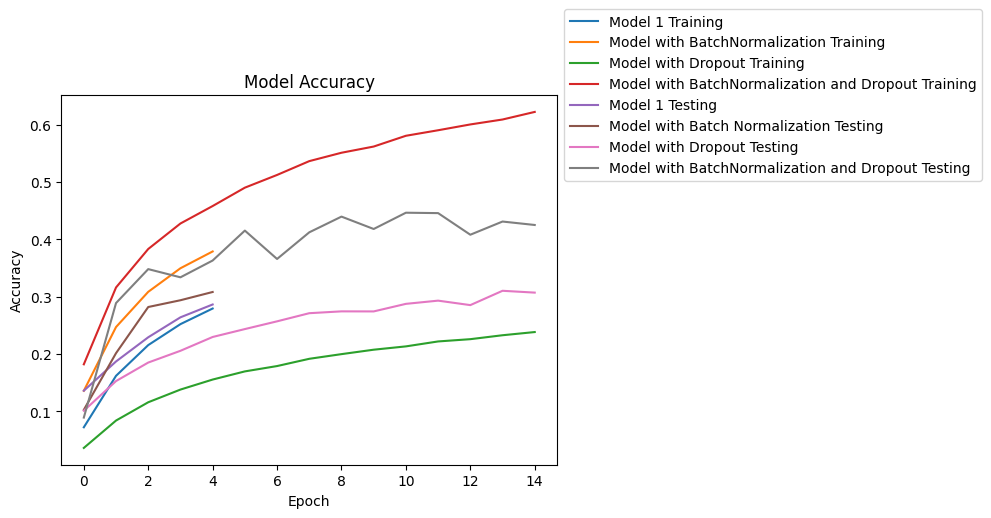

In [20]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_4_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.plot(model_3_history.history['val_accuracy'])
plt.plot(model_4_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training', 'Model with BatchNormalization Training', 
            'Model with Dropout Training', 'Model with BatchNormalization and Dropout Training',
            'Model 1 Testing', 'Model with Batch Normalization Testing',
            'Model with Dropout Testing',
            'Model with BatchNormalization and Dropout Testing'],
            loc='center left', bbox_to_anchor=(1,1))

Вывод:
Точнее всего работает модель с использованием Dropout и BatchNormalization.
